# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [3]:
import random

class Card:
    """Represents a playing card."""
    
    # Define ranks and suits globally
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __str__(self):
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self):
        return f'{self.rank} of {self.suit}'
    


In [4]:
class Deck:
    """Represents a deck of cards, supporting multiple 52-card sets."""
    
    def __init__(self, num_decks=1):
        # Create a deck of num_decks standard 52 cards
        self.cards = []
        for _ in range(num_decks):
            for suit in Card.suits:
                for rank in Card.ranks:
                    self.cards.append(Card(rank, suit))
        
        # Add the plastic card randomly in the deck
        self.plastic_card = Card('Plastic', 'Special')  # A special card
        self.cards.append(self.plastic_card)
        
        # Shuffle the deck initially
        self.shuffle()

    def shuffle(self):
        """Shuffles the deck of cards."""
        random.shuffle(self.cards)
    
    def draw(self):
        """Draws one card from the deck."""
        if len(self.cards) == 0:
            raise ValueError("Deck is empty")
        
        card = self.cards.pop()
        
        # If the plastic card was drawn, reshuffle the deck before the next deal
        if card == self.plastic_card:
            print("Plastic card drawn! Reshuffling the deck...")
            self.shuffle()
        
        return card
    
    def __str__(self):
        return f'Deck of {len(self.cards)} cards'
    
    def size(self):
        """Returns the number of cards left in the deck."""
        return len(self.cards)
    
    def add_card(self, card):
        """Add a single card back to the deck (useful for a discarded card)."""
        self.cards.append(card)
    
    def deal_hand(self, num_cards):
        """Deals a hand of 'num_cards' from the deck."""
        hand = []
        for _ in range(num_cards):
            if len(self.cards) > 0:
                hand.append(self.draw())
            else:
                raise ValueError("Not enough cards in the deck to deal a hand.")
        return hand

In [5]:
deck = Deck(num_decks=2)

# Deal a hand of 5 cards
hand = deck.deal_hand(5)
print("Hand dealt:", hand)

# Draw a card from the deck (to simulate drawing randomly)
card = deck.draw()
print("Card drawn:", card)

Hand dealt: [7 of Hearts, J of Spades, 10 of Clubs, 4 of Spades, 2 of Hearts]
Card drawn: 10 of Diamonds


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [6]:
import random

class Card:
    # Define ranks and suits globally
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
    
    def __str__(self):
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self):
        return f'{self.rank} of {self.suit}'
    


In [7]:
import random

class Deck:
    
    cards: list
    plastic_card: Card
    
    # Constructor
    def __init__(self, num_decks: int = 1):
        pass  
    
    # Methods
    def shuffle(self):
        pass  
    
    def draw(self) -> Card:
        pass  
    
    def add_card(self, card: Card):
        pass  
    
    def size(self) -> int:
        pass  
    
    def deal_hand(self, num_cards: int) -> list:
        pass  


In [8]:
class Player:

    
    name: str
    hand: 'Hand'  
    
    # Constructor
    def __init__(self, name: str):
        pass  
    
    # Methods
    def receive_hand(self, hand: 'Hand'):
        pass  
    
    def play_card(self, card: Card) -> Card:
        pass  
    
    def discard_hand(self):
        pass  


In [9]:
class Hand:

    

    cards: list  
    
    # Constructor
    def __init__(self):
        pass  
    
    # Methods
    def add_card(self, card: Card):
        pass  
    
    def remove_card(self, card: Card) -> Card:
        pass  
    
    def clear_hand(self):
        pass  


In [10]:
class Game:
    
    # Data members
    deck: Deck
    players: list  # List of Player objects
    current_turn: int
    
    # Constructor
    def __init__(self, players: list, num_decks: int = 1):
        pass  # We'll implement later
    
    # Methods
    def start_game(self):
        pass  # We'll implement later
    
    def deal_cards(self):
        pass  # We'll implement later
    
    def play_turn(self):
        pass  # We'll implement later
    
    def check_winner(self) -> Player:
        pass  # We'll implement later


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [19]:
class Card:
 
    
    # Data members (constants for suits and ranks)
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    
    def __init__(self, rank: str, suit: str):
        """

        """
        # Special handling for the 'Plastic' card
        if rank == 'Plastic' and suit == 'Special':
            self.rank = rank
            self.suit = suit
        else:
            if rank not in self.RANKS:
                raise ValueError(f"Invalid rank: {rank}")
            if suit not in self.SUITS:
                raise ValueError(f"Invalid suit: {suit}")
            self.rank = rank
            self.suit = suit

    def __str__(self) -> str:

        if self.rank == 'Plastic' and self.suit == 'Special':
            return 'Plastic Special'
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self) -> str:

        if self.rank == 'Plastic' and self.suit == 'Special':
            return 'Plastic Special'
        return f'{self.rank} of {self.suit}'


In [20]:
class Deck:

    
    def __init__(self, num_decks: int = 1):
        """Initialize the deck with multiple sets of cards."""
        self.cards = []
        for _ in range(num_decks):
            for suit in Card.SUITS:
                for rank in Card.RANKS:
                    self.cards.append(Card(rank, suit))
        
        # Add the plastic card
        self.plastic_card = Card('Plastic', 'Special')
        self.cards.append(self.plastic_card)
        
        self.shuffle()  # Initial shuffle when deck is created

    def shuffle(self):
        """Shuffles the deck of cards."""
        random.shuffle(self.cards)
    
    def draw(self) -> Card:
        """Draws one card from the deck."""
        if len(self.cards) == 0:
            raise ValueError("Deck is empty")
        
        card = self.cards.pop()
        
        # If the plastic card is drawn, reshuffle before the next deal
        if card == self.plastic_card:
            print("Plastic card drawn! Reshuffling the deck...")
            self.shuffle()
        
        return card
    
    def add_card(self, card: Card):
        """Adds a card back to the deck."""
        self.cards.append(card)
    
    def size(self) -> int:
        """Returns the number of cards left in the deck."""
        return len(self.cards)
    
    def deal_hand(self, num_cards: int) -> list:
        """Deals a hand of 'num_cards' from the deck."""
        hand = []
        for _ in range(num_cards):
            if len(self.cards) > 0:
                hand.append(self.draw())
            else:
                raise ValueError("Not enough cards in the deck to deal a hand.")
        return hand



In [21]:
class Hand:
    """Represents a player's hand of cards."""
    
    def __init__(self):
        self.cards = []  # List of Card objects
    
    def add_card(self, card: Card):
        """Adds a card to the player's hand."""
        self.cards.append(card)
    
    def remove_card(self, card: Card) -> Card:
        """Removes a specific card from the player's hand."""
        if card in self.cards:
            self.cards.remove(card)
            return card
        else:
            raise ValueError(f"Card {card} not in hand.")
    
    def clear_hand(self):
        """Clears the player's hand."""
        self.cards.clear()
    
    def __str__(self):
        """Returns a string of all cards in the hand."""
        return ', '.join(str(card) for card in self.cards)


In [22]:
class Player:
    """Represents a generic player in the game."""
    
    def __init__(self, name: str):
        self.name = name
        self.hand = Hand()
    
    def receive_hand(self, hand: Hand):
        """Receive a hand of cards."""
        self.hand = hand
    
    def play_card(self, card: Card) -> Card:
        """Play a card (for human or dealer to choose)."""
        return self.hand.remove_card(card)
    
    def discard_hand(self):
        """Discard the player's hand."""
        self.hand.clear_hand()




In [23]:
class DealerPlayer(Player):
    """Represents the dealer, who automatically makes decisions."""
    
    def __init__(self, name: str):
        super().__init__(name)
    
    def play_turn(self):
        """The dealer plays a turn, automatically choosing cards to play."""
        print(f"{self.name} (Dealer) is playing a turn.")
        # Example of simple logic: Dealer always plays the first card in hand
        if len(self.hand.cards) > 0:
            card = self.hand.cards[0]
            print(f"Dealer plays: {card}")
            return self.play_card(card)
        return None

In [24]:
class HumanPlayer(Player):
    """Represents a human player who makes decisions interactively."""
    
    def __init__(self, name: str):
        super().__init__(name)
    
    def play_turn(self):
        """The human player chooses a card to play (interactive)."""
        print(f"{self.name}'s turn!")
        print("Your hand:", self.hand)
        card_str = input("Choose a card to play (e.g., '2 of Hearts'): ")
        selected_card = None
        
        for card in self.hand.cards:
            if card_str.lower() == str(card).lower():
                selected_card = card
                break
        
        if selected_card:
            print(f"{self.name} plays: {selected_card}")
            return self.play_card(selected_card)
        else:
            print("Invalid card selection. Try again.")
            return self.play_turn()

In [25]:
class Game:
    """Represents the overall game, managing turns, dealing, and determining the winner."""
    
    def __init__(self, players: list, num_decks: int = 1):
        self.deck = Deck(num_decks)
        self.players = players
        self.current_turn = 0
    
    def start_game(self):
        """Start the game and deal initial hands to the players."""
        print("Starting game...")
        for player in self.players:
            hand = Hand()
            for _ in range(5):  # Deal 5 cards to each player
                hand.add_card(self.deck.draw())
            player.receive_hand(hand)
        
        self.play_turn()
    
    def play_turn(self):
        """Run one turn of the game."""
        current_player = self.players[self.current_turn % len(self.players)]
        current_player.play_turn()
        
        self.current_turn += 1
        
        # After each turn, check if game over or continue
        if self.current_turn < 10:  # Placeholder for number of turns
            self.play_turn()
        else:
            print("Game Over!")
            # Add more logic for determining winner, etc.


In [29]:
# Create a deck with 1 set of 52 cards + 1 plastic card
deck = Deck()

# Draw cards and see the behavior
for _ in range(5):
    card = deck.draw()
    print(f"Drawn card: {card}")

Drawn card: A of Hearts
Drawn card: 9 of Diamonds
Plastic card drawn! Reshuffling the deck...
Drawn card: Plastic Special
Drawn card: 6 of Spades
Drawn card: 4 of Spades


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [30]:
import random

# Card class definition
class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank: str, suit: str):
        if rank == 'Plastic' and suit == 'Special':
            self.rank = rank
            self.suit = suit
        else:
            if rank not in self.RANKS:
                raise ValueError(f"Invalid rank: {rank}")
            if suit not in self.SUITS:
                raise ValueError(f"Invalid suit: {suit}")
            self.rank = rank
            self.suit = suit

    def __str__(self) -> str:
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self) -> str:
        return f'{self.rank} of {self.suit}'

    def value(self) -> int:
        """Returns the Blackjack value of the card."""
        if self.rank in ['J', 'Q', 'K', '10']:
            return 10
        elif self.rank == 'A':
            return 1  # We will handle Aces as either 1 or 11 later
        else:
            return int(self.rank)

# Deck class definition
class Deck:
    def __init__(self, num_decks: int = 1):
        self.cards = []
        for _ in range(num_decks):
            for suit in Card.SUITS:
                for rank in Card.RANKS:
                    self.cards.append(Card(rank, suit))
        random.shuffle(self.cards)
    
    def draw(self) -> Card:
        if len(self.cards) == 0:
            raise ValueError("Deck is empty")
        return self.cards.pop()
    
    def shuffle(self):
        random.shuffle(self.cards)

# Player class definition
class Player:
    def __init__(self, name: str):
        self.name = name
        self.hand = []
        self.bet = 0

    def receive_card(self, card: Card):
        """Receive a card into the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self) -> int:
        """Calculate the total value of the hand, accounting for Aces as 1 or 11."""
        total = sum(card.value() for card in self.hand)
        num_aces = sum(1 for card in self.hand if card.rank == 'A')
        
        # Adjust for Aces being 11 if it doesn't bust the hand
        for _ in range(num_aces):
            if total + 10 <= 21:
                total += 10
        return total

    def show_hand(self):
        """Display the player's current hand."""
        return ', '.join(str(card) for card in self.hand)

    def is_busted(self) -> bool:
        """Check if the player has busted."""
        return self.hand_value() > 21

# Game class definition for Blackjack
class BlackjackGame:
    def __init__(self, players: list, num_decks: int = 1):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Player("Dealer")
        self.rounds = 0

    def start_game(self):
        """Start the game by dealing cards to players and the dealer."""
        print("Starting Blackjack game...\n")
        self.rounds += 1

        # Deal initial two cards to each player and the dealer
        for player in self.players:
            player.clear_hand()
            player.receive_card(self.deck.draw())
            player.receive_card(self.deck.draw())
            print(f"{player.name}'s hand: {player.show_hand()} (Value: {player.hand_value()})")

        self.dealer.clear_hand()
        self.dealer.receive_card(self.deck.draw())
        self.dealer.receive_card(self.deck.draw())
        print(f"Dealer's hand: {self.dealer.show_hand().split(',')[0]} and [Hidden]")

        self.play_round()

    def play_round(self):
        """Play one round of Blackjack."""
        for player in self.players:
            print(f"\n{player.name}'s turn:")
            while True:
                print(f"  {player.name}'s hand: {player.show_hand()} (Value: {player.hand_value()})")
                if player.is_busted():
                    print(f"  {player.name} has busted!")
                    break
                action = input("  Choose action: (H)it, (S)tand: ").lower()
                if action == 'h':  # Hit
                    player.receive_card(self.deck.draw())
                elif action == 's':  # Stand
                    break
                else:
                    print("  Invalid input. Please enter 'H' for hit or 'S' for stand.")
        
        # After all players have played, the dealer's turn:
        self.dealer_turn()

    def dealer_turn(self):
        """Play the dealer's turn following the house rules."""
        print(f"\nDealer's hand: {self.dealer.show_hand()} (Value: {self.dealer.hand_value()})")
        while self.dealer.hand_value() < 17:
            print("  Dealer hits.")
            self.dealer.receive_card(self.deck.draw())
            print(f"  Dealer's hand: {self.dealer.show_hand()} (Value: {self.dealer.hand_value()})")

        if self.dealer.is_busted():
            print("  Dealer has busted!")

        self.determine_winner()

    def determine_winner(self):
        """Determine the winner for the round."""
        print("\nResults:")
        dealer_value = self.dealer.hand_value()
        print(f"Dealer's final hand: {self.dealer.show_hand()} (Value: {dealer_value})")

        for player in self.players:
            player_value = player.hand_value()
            print(f"{player.name}'s final hand: {player.show_hand()} (Value: {player_value})")
            if player.is_busted():
                print(f"  {player.name} busts. Dealer wins!")
            elif dealer_value > 21:
                print(f"  Dealer busts. {player.name} wins!")
            elif player_value > dealer_value:
                print(f"  {player.name} wins!")
            elif player_value < dealer_value:
                print(f"  {player.name} loses.")
            else:
                print(f"  {player.name} ties with the dealer.")

    def play(self):
        """Play the game."""
        self.start_game()

# Simulate a game with 2 players
def simulate_blackjack_game():
    # Create player objects
    player1 = Player("Player 1")
    player2 = Player("Player 2")

    # Create the Blackjack game with 2 players
    game = BlackjackGame([player1, player2])

    # Play the game
    game.play()

# Run the simulation
simulate_blackjack_game()


Starting Blackjack game...

Player 1's hand: 7 of Hearts, 9 of Clubs (Value: 16)
Player 2's hand: A of Clubs, 6 of Diamonds (Value: 17)
Dealer's hand: 2 of Hearts and [Hidden]

Player 1's turn:
  Player 1's hand: 7 of Hearts, 9 of Clubs (Value: 16)


  Choose action: (H)it, (S)tand:  hit


  Invalid input. Please enter 'H' for hit or 'S' for stand.
  Player 1's hand: 7 of Hearts, 9 of Clubs (Value: 16)


  Choose action: (H)it, (S)tand:  H


  Player 1's hand: 7 of Hearts, 9 of Clubs, 10 of Diamonds (Value: 26)
  Player 1 has busted!

Player 2's turn:
  Player 2's hand: A of Clubs, 6 of Diamonds (Value: 17)


  Choose action: (H)it, (S)tand:  S



Dealer's hand: 2 of Hearts, 2 of Diamonds (Value: 4)
  Dealer hits.
  Dealer's hand: 2 of Hearts, 2 of Diamonds, 5 of Clubs (Value: 9)
  Dealer hits.
  Dealer's hand: 2 of Hearts, 2 of Diamonds, 5 of Clubs, 8 of Clubs (Value: 17)

Results:
Dealer's final hand: 2 of Hearts, 2 of Diamonds, 5 of Clubs, 8 of Clubs (Value: 17)
Player 1's final hand: 7 of Hearts, 9 of Clubs, 10 of Diamonds (Value: 26)
  Player 1 busts. Dealer wins!
Player 2's final hand: A of Clubs, 6 of Diamonds (Value: 17)
  Player 2 ties with the dealer.


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [35]:
import random

# Card class definition
class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank: str, suit: str):
        if rank == 'Plastic' and suit == 'Special':
            self.rank = rank
            self.suit = suit
        else:
            if rank not in self.RANKS:
                raise ValueError(f"Invalid rank: {rank}")
            if suit not in self.SUITS:
                raise ValueError(f"Invalid suit: {suit}")
            self.rank = rank
            self.suit = suit

    def __str__(self) -> str:
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self) -> str:
        return f'{self.rank} of {self.suit}'

    def value(self) -> int:
        """Returns the Blackjack value of the card."""
        if self.rank in ['J', 'Q', 'K', '10']:
            return 10
        elif self.rank == 'A':
            return 1  # We will handle Aces as either 1 or 11 later
        else:
            return int(self.rank)

    def count_value(self) -> int:
        """Card counting strategy: assign values for strategy"""
        if self.rank in ['2', '3', '4', '5', '6']:
            return 1
        elif self.rank in ['7', '8', '9']:
            return 0
        else:
            return -1

# Deck class definition
class Deck:
    def __init__(self, num_decks: int = 1):
        self.cards = []
        for _ in range(num_decks):
            for suit in Card.SUITS:
                for rank in Card.RANKS:
                    self.cards.append(Card(rank, suit))
        random.shuffle(self.cards)
    
    def draw(self) -> Card:
        if len(self.cards) == 0:
            raise ValueError("Deck is empty")
        return self.cards.pop()
    
    def shuffle(self):
        random.shuffle(self.cards)

# Player class definition
class Player:
    def __init__(self, name: str):
        self.name = name
        self.hand = []
        self.bet = 0

    def receive_card(self, card: Card):
        """Receive a card into the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self) -> int:
        """Calculate the total value of the hand, accounting for Aces as 1 or 11."""
        total = sum(card.value() for card in self.hand)
        num_aces = sum(1 for card in self.hand if card.rank == 'A')
        
        # Adjust for Aces being 11 if it doesn't bust the hand
        for _ in range(num_aces):
            if total + 10 <= 21:
                total += 10
        return total

    def show_hand(self):
        """Display the player's current hand."""
        return ', '.join(str(card) for card in self.hand)

    def is_busted(self) -> bool:
        """Check if the player has busted."""
        return self.hand_value() > 21

    def play_turn(self, deck: Deck):
        """Basic implementation of the player's turn."""
        print(f"\n{self.name}'s turn:")
        while True:
            print(f"  {self.name}'s hand: {self.show_hand()} (Value: {self.hand_value()})")
            if self.is_busted():
                print(f"  {self.name} has busted!")
                break
            action = input("  Choose action: (H)it, (S)tand: ").lower()
            if action == 'h':  # Hit
                card = deck.draw()
                print(f"  {self.name} decides to hit and draws {card}")
                self.receive_card(card)
            elif action == 's':  # Stay
                print(f"  {self.name} decides to stay.")
                break
            else:
                print("  Invalid input. Please enter 'H' for hit or 'S' for stand.")

# CardCountingPlayer class definition (new strategy)
class CardCountingPlayer(Player):
    def __init__(self, name: str, threshold: int = -2):
        super().__init__(name)
        self.running_count = 0  # The running card count for the card counting strategy
        self.threshold = threshold  # The threshold to decide whether to hit or stay

    def receive_card(self, card: Card):
        """Override receive_card to update the running count based on the card seen."""
        super().receive_card(card)
        self.running_count += card.count_value()  # Update the running count based on card's value

    def decide_action(self) -> str:
        """Decide whether to hit or stay based on the running count."""
        if self.running_count < self.threshold:
            return "h"  # Hit
        else:
            return "s"  # Stay

    def play_turn(self, deck: Deck):
        """Override the play_turn method to implement the new strategy."""
        print(f"\n{self.name}'s turn:")
        while True:
            print(f"  {self.name}'s hand: {self.show_hand()} (Value: {self.hand_value()})")
            if self.is_busted():
                print(f"  {self.name} has busted!")
                break
            action = self.decide_action()
            if action == 'h':  # Hit
                card = deck.draw()
                print(f"  {self.name} decides to hit and draws {card}")
                self.receive_card(card)
            elif action == 's':  # Stay
                print(f"  {self.name} decides to stay.")
                break

# BlackjackGame class definition for Blackjack
class BlackjackGame:
    def __init__(self, players: list, num_decks: int = 1):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Player("Dealer")
        self.rounds = 0

    def start_game(self):
        """Start the game by dealing cards to players and the dealer."""
        print("Starting Blackjack game...\n")
        self.rounds += 1

        # Deal initial two cards to each player and the dealer
        for player in self.players:
            player.clear_hand()
            player.receive_card(self.deck.draw())
            player.receive_card(self.deck.draw())
            print(f"{player.name}'s hand: {player.show_hand()} (Value: {player.hand_value()})")

        self.dealer.clear_hand()
        self.dealer.receive_card(self.deck.draw())
        self.dealer.receive_card(self.deck.draw())
        print(f"Dealer's hand: {self.dealer.show_hand().split(',')[0]} and [Hidden]")

        self.play_round()

    def play_round(self):
        """Play one round of Blackjack."""
        for player in self.players:
            player.play_turn(self.deck)

        # After all players have played, the dealer's turn:
        self.dealer_turn()

    def dealer_turn(self):
        """Play the dealer's turn following the house rules."""
        print(f"\nDealer's hand: {self.dealer.show_hand()} (Value: {self.dealer.hand_value()})")
        while self.dealer.hand_value() < 17:
            print("  Dealer hits.")
            self.dealer.receive_card(self.deck.draw())
            print(f"  Dealer's hand: {self.dealer.show_hand()} (Value: {self.dealer.hand_value()})")

        if self.dealer.is_busted():
            print("  Dealer has busted!")

        self.determine_winner()

    def determine_winner(self):
        """Determine the winner for the round."""
        print("\nResults:")
        dealer_value = self.dealer.hand_value()
        print(f"Dealer's final hand: {self.dealer.show_hand()} (Value: {dealer_value})")

        for player in self.players:
            player_value = player.hand_value()
            print(f"{player.name}'s final hand: {player.show_hand()} (Value: {player_value})")
            if player.is_busted():
                print(f"  {player.name} busts. Dealer wins!")
            elif dealer_value > 21:
                print(f"  Dealer busts. {player.name} wins!")
            elif player_value > dealer_value:
                print(f"  {player.name} wins!")
            elif player_value < dealer_value:
                print(f"  {player.name} loses.")
            else:
                print(f"  {player.name} ties with the dealer.")
    def play(self):
        """Play the game."""
        self.start_game()

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [59]:
import random

# Card class definition
class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank: str, suit: str):
        if rank == 'Plastic' and suit == 'Special':
            self.rank = rank
            self.suit = suit
        else:
            if rank not in self.RANKS:
                raise ValueError(f"Invalid rank: {rank}")
            if suit not in self.SUITS:
                raise ValueError(f"Invalid suit: {suit}")
            self.rank = rank
            self.suit = suit

    def __str__(self) -> str:
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self) -> str:
        return f'{self.rank} of {self.suit}'

    def value(self) -> int:
        """Returns the Blackjack value of the card."""
        if self.rank in ['J', 'Q', 'K', '10']:
            return 10
        elif self.rank == 'A':
            return 1  # We will handle Aces as either 1 or 11 later
        else:
            return int(self.rank)

    def count_value(self) -> int:
        """Card counting strategy: assign values for strategy"""
        if self.rank in ['2', '3', '4', '5', '6']:
            return 1
        elif self.rank in ['7', '8', '9']:
            return 0
        else:
            return -1

# Deck class definition
class Deck:
    def __init__(self, num_decks: int = 1):
        self.num_decks = num_decks
        self.cards = []
        self.create_deck()

    def create_deck(self):
        """Populate the deck with the correct number of decks and shuffle it."""
        self.cards = []
        for _ in range(self.num_decks):
            for suit in Card.SUITS:
                for rank in Card.RANKS:
                    self.cards.append(Card(rank, suit))
        random.shuffle(self.cards)
    
    def draw(self) -> Card:
        """Draw a card from the deck."""
        if len(self.cards) == 0:  # If the deck is empty, reshuffle the cards
            #print("Deck is empty. Reshuffling...")
            self.create_deck()  # Recreate and reshuffle the deck
        return self.cards.pop()

    def shuffle(self):
        """Shuffles the deck."""
        random.shuffle(self.cards)
# Player class definition
class Player:
    def __init__(self, name: str, chips: int = 100):
        self.name = name
        self.hand = []
        self.bet = 0
        self.chips = chips

    def receive_card(self, card: Card):
        """Receive a card into the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self) -> int:
        """Calculate the total value of the hand, accounting for Aces as 1 or 11."""
        total = sum(card.value() for card in self.hand)
        num_aces = sum(1 for card in self.hand if card.rank == 'A')
        
        # Adjust for Aces being 11 if it doesn't bust the hand
        for _ in range(num_aces):
            if total + 10 <= 21:
                total += 10
        return total

    def show_hand(self):
        """Display the player's current hand."""
        return ', '.join(str(card) for card in self.hand)

    def is_busted(self) -> bool:
        """Check if the player has busted."""
        return self.hand_value() > 21

    def place_bet(self, amount: int):
        """Place a bet (must be less than or equal to the player's available chips)."""
        if amount <= self.chips:
            self.bet = amount
        else:
            raise ValueError("Insufficient chips to place the bet.")

    def win_bet(self):
        """Player wins the bet (typically wins double the bet)."""
        self.chips += self.bet
        self.bet = 0

    def lose_bet(self):
        """Player loses the bet."""
        self.chips -= self.bet
        self.bet = 0

    def tie_bet(self):
        """Player ties the bet."""
        self.bet = 0
    def play_turn(self, deck: Deck, verbose: bool = False):
        """Placeholder play_turn method for Player."""

        pass  
# CardCountingPlayer class definition (new strategy)
class CardCountingPlayer(Player):
    def __init__(self, name: str, chips: int = 100, threshold: int = -2):
        super().__init__(name, chips)
        self.running_count = 0  # The running card count for the card counting strategy
        self.threshold = threshold  # The threshold to decide whether to hit or stay

    def receive_card(self, card: Card):
        """Override receive_card to update the running count based on the card seen."""
        super().receive_card(card)
        self.running_count += card.count_value()  # Update the running count based on card's value

    def decide_action(self) -> str:
        """Decide whether to hit or stay based on the running count."""
        if self.running_count < self.threshold:
            return "h"  # Hit
        else:
            return "s"  # Stay

    def play_turn(self, deck: Deck, verbose: bool = False):
        """Override the play_turn method to implement the new strategy."""
        if verbose:
            print(f"\n{self.name}'s turn:")
        while True:
            if verbose:
                print(f"  {self.name}'s hand: {self.show_hand()} (Value: {self.hand_value()})")
            if self.is_busted():
                if verbose:
                    print(f"  {self.name} has busted!")
                break
            action = self.decide_action()
            if action == 'h':  # Hit
                card = deck.draw()
                if verbose:
                    print(f"  {self.name} decides to hit and draws {card}")
                self.receive_card(card)
            elif action == 's':  # Stay
                if verbose:
                    print(f"  {self.name} decides to stay.")
                break
# BlackjackGame class definition for Blackjack
class BlackjackGame:
    def __init__(self, players: list, num_decks: int = 1, verbose: bool = False):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Player("Dealer")
        self.rounds = 0
        self.verbose = verbose

    def start_game(self):
        """Start the game by dealing cards to players and the dealer."""
        self.rounds += 1

        # Deal initial two cards to each player and the dealer
        for player in self.players:
            player.clear_hand()
            player.receive_card(self.deck.draw())
            player.receive_card(self.deck.draw())

        self.dealer.clear_hand()
        self.dealer.receive_card(self.deck.draw())
        self.dealer.receive_card(self.deck.draw())

        self.play_round()

    def play_round(self):
        """Play one round of Blackjack."""
        # Players' turns
        for player in self.players:
            if player.chips <= 0:
                continue  # Skip the round if player has no chips left
            bet = min(player.chips, 10)  # Place a fixed bet for simplicity
            player.place_bet(bet)
            player.play_turn(self.deck, self.verbose)

        # Dealer's turn
        self.dealer_turn()

        # Determine winners for all players
        self.determine_winner()

    def dealer_turn(self):
        """Play the dealer's turn following the house rules."""
        while self.dealer.hand_value() < 17:
            card = self.deck.draw()
            self.dealer.receive_card(card)

    def determine_winner(self):
        """Determine the winner for the round."""
        dealer_value = self.dealer.hand_value()
        for player in self.players:
            if player.chips <= 0:
                continue  # Skip if player has no chips

            player_value = player.hand_value()
            if player.is_busted():
                player.lose_bet()
            elif dealer_value > 21:
                player.win_bet()
            elif player_value > dealer_value:
                player.win_bet()
            elif player_value < dealer_value:
                player.lose_bet()
            else:
                player.tie_bet()

    def play_multiple_rounds(self, num_rounds: int = 50):
        """Play multiple rounds and compute the strategy player's winnings."""
        strategy_player = next(player for player in self.players if isinstance(player, CardCountingPlayer))
        
        for _ in range(num_rounds):
            if strategy_player.chips <= 0:
                print(f"{strategy_player.name} is out of money!")
                break
            self.start_game()

        print(f"{strategy_player.name}'s final chip count: {strategy_player.chips}")
        return strategy_player.chips

# Test scenario setup
def test_blackjack_game():
    players = [
        CardCountingPlayer("StrategyPlayer", chips=100),
        Player("Player2", chips=100),
        Player("Player3", chips=100),
        Player("Player4", chips=100)]


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer's final chip count: 110
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip coun

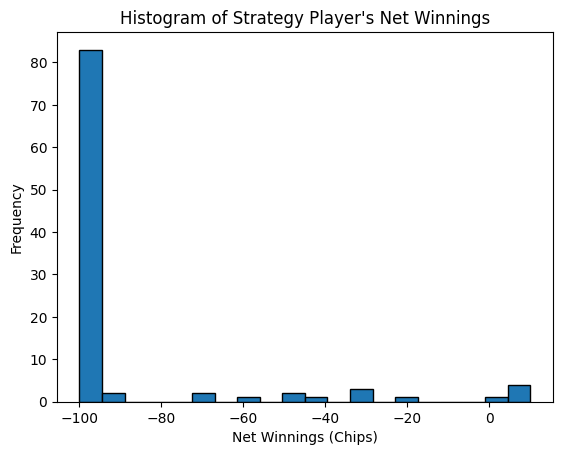

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(num_games: int = 100, num_rounds: int = 50):
    winnings = []
    
    for game in range(num_games):
        # Set up the game
        strategy_player = CardCountingPlayer("StrategyPlayer", chips=100)
        players = [strategy_player,
                   Player("Player2", chips=100),
                   Player("Player3", chips=100),
                   Player("Player4", chips=100)]
        
        game_instance = BlackjackGame(players=players, num_decks=1, verbose=False)  # No verbose printouts
        
        # Play the game and get the final chip count of the strategy player
        final_chips = game_instance.play_multiple_rounds(num_rounds=num_rounds)
        
        # Record the winnings (or losses) for the strategy player
        winnings.append(final_chips - 100)  # Initial chips are 100, so we track net winnings
    
    return winnings

def analyze_results(winnings):
    """Analyze and display the results."""
    # Convert winnings list to a numpy array for easier analysis
    winnings_array = np.array(winnings)
    
    # Calculate the average and standard deviation
    avg_winnings = np.mean(winnings_array)
    std_winnings = np.std(winnings_array)
    
    # Calculate probability of net win or loss
    prob_win = np.sum(winnings_array > 0) / len(winnings_array)
    prob_loss = np.sum(winnings_array < 0) / len(winnings_array)
    
    # Print final results (only these outputs)
    print(f"Average winnings per game: {avg_winnings:.2f}")
    print(f"Standard deviation of winnings: {std_winnings:.2f}")
    print(f"Probability of net win: {prob_win:.4f}")
    print(f"Probability of net loss: {prob_loss:.4f}")
    
    # Plot histogram
    plt.hist(winnings_array, bins=20, edgecolor='black')
    plt.title('Histogram of Strategy Player\'s Net Winnings')
    plt.xlabel('Net Winnings (Chips)')
    plt.ylabel('Frequency')
    plt.show()


# Run the simulation (100 games, 50 rounds each)
winnings = run_simulation(num_games=100, num_rounds=50)

# Analyze and display the results (average winnings, std dev, probabilities, and histogram)
analyze_results(winnings)


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [61]:
import random

# Card class definition
class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank: str, suit: str):
        if rank == 'Plastic' and suit == 'Special':
            self.rank = rank
            self.suit = suit
        else:
            if rank not in self.RANKS:
                raise ValueError(f"Invalid rank: {rank}")
            if suit not in self.SUITS:
                raise ValueError(f"Invalid suit: {suit}")
            self.rank = rank
            self.suit = suit

    def __str__(self) -> str:
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self) -> str:
        return f'{self.rank} of {self.suit}'

    def value(self) -> int:
        """Returns the Blackjack value of the card."""
        if self.rank in ['J', 'Q', 'K', '10']:
            return 10
        elif self.rank == 'A':
            return 1  # We will handle Aces as either 1 or 11 later
        else:
            return int(self.rank)

    def count_value(self) -> int:
        """Card counting strategy: assign values for strategy"""
        if self.rank in ['2', '3', '4', '5', '6']:
            return 1
        elif self.rank in ['7', '8', '9']:
            return 0
        else:
            return -1

# Deck class definition
class Deck:
    def __init__(self, num_decks: int = 1):
        self.num_decks = num_decks
        self.cards = []
        self.create_deck()

    def create_deck(self):
        """Populate the deck with the correct number of decks and shuffle it."""
        self.cards = []
        for _ in range(self.num_decks):
            for suit in Card.SUITS:
                for rank in Card.RANKS:
                    self.cards.append(Card(rank, suit))
        random.shuffle(self.cards)
    
    def draw(self) -> Card:
        """Draw a card from the deck."""
        if len(self.cards) == 0:  # If the deck is empty, reshuffle the cards
            #print("Deck is empty. Reshuffling...")
            self.create_deck()  # Recreate and reshuffle the deck
        return self.cards.pop()

    def shuffle(self):
        """Shuffles the deck."""
        random.shuffle(self.cards)
# Player class definition
class Player:
    def __init__(self, name: str, chips: int = 100):
        self.name = name
        self.hand = []
        self.bet = 0
        self.chips = chips

    def receive_card(self, card: Card):
        """Receive a card into the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self) -> int:
        """Calculate the total value of the hand, accounting for Aces as 1 or 11."""
        total = sum(card.value() for card in self.hand)
        num_aces = sum(1 for card in self.hand if card.rank == 'A')
        
        # Adjust for Aces being 11 if it doesn't bust the hand
        for _ in range(num_aces):
            if total + 10 <= 21:
                total += 10
        return total

    def show_hand(self):
        """Display the player's current hand."""
        return ', '.join(str(card) for card in self.hand)

    def is_busted(self) -> bool:
        """Check if the player has busted."""
        return self.hand_value() > 21

    def place_bet(self, amount: int):
        """Place a bet (must be less than or equal to the player's available chips)."""
        if amount <= self.chips:
            self.bet = amount
        else:
            raise ValueError("Insufficient chips to place the bet.")

    def win_bet(self):
        """Player wins the bet (typically wins double the bet)."""
        self.chips += self.bet
        self.bet = 0

    def lose_bet(self):
        """Player loses the bet."""
        self.chips -= self.bet
        self.bet = 0

    def tie_bet(self):
        """Player ties the bet."""
        self.bet = 0
    def play_turn(self, deck: Deck, verbose: bool = False):
        """Placeholder play_turn method for Player."""

        pass  
# CardCountingPlayer class definition (new strategy)
class CardCountingPlayer(Player):
    def __init__(self, name: str, chips: int = 100, threshold: int = 17):
        super().__init__(name, chips)
        self.running_count = 0  # The running card count for the card counting strategy
        self.threshold = threshold  # The threshold to decide whether to hit or stay

    def receive_card(self, card: Card):
        """Override receive_card to update the running count based on the card seen."""
        super().receive_card(card)
        self.running_count += card.count_value()  # Update the running count based on card's value

    def decide_action(self) -> str:
        """Decide whether to hit or stay based on the running count."""
        if self.running_count < self.threshold:
            return "h"  # Hit
        else:
            return "s"  # Stay

    def play_turn(self, deck: Deck, verbose: bool = False):
        """Override the play_turn method to implement the new strategy."""
        if verbose:
            print(f"\n{self.name}'s turn:")
        while True:
            if verbose:
                print(f"  {self.name}'s hand: {self.show_hand()} (Value: {self.hand_value()})")
            if self.is_busted():
                if verbose:
                    print(f"  {self.name} has busted!")
                break
            action = self.decide_action()
            if action == 'h':  # Hit
                card = deck.draw()
                if verbose:
                    print(f"  {self.name} decides to hit and draws {card}")
                self.receive_card(card)
            elif action == 's':  # Stay
                if verbose:
                    print(f"  {self.name} decides to stay.")
                break
# BlackjackGame class definition for Blackjack
class BlackjackGame:
    def __init__(self, players: list, num_decks: int = 1, verbose: bool = False):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Player("Dealer")
        self.rounds = 0
        self.verbose = verbose

    def start_game(self):
        """Start the game by dealing cards to players and the dealer."""
        self.rounds += 1

        # Deal initial two cards to each player and the dealer
        for player in self.players:
            player.clear_hand()
            player.receive_card(self.deck.draw())
            player.receive_card(self.deck.draw())

        self.dealer.clear_hand()
        self.dealer.receive_card(self.deck.draw())
        self.dealer.receive_card(self.deck.draw())

        self.play_round()

    def play_round(self):
        """Play one round of Blackjack."""
        # Players' turns
        for player in self.players:
            if player.chips <= 0:
                continue  # Skip the round if player has no chips left
            bet = min(player.chips, 10)  # Place a fixed bet for simplicity
            player.place_bet(bet)
            player.play_turn(self.deck, self.verbose)

        # Dealer's turn
        self.dealer_turn()

        # Determine winners for all players
        self.determine_winner()

    def dealer_turn(self):
        """Play the dealer's turn following the house rules."""
        while self.dealer.hand_value() < 17:
            card = self.deck.draw()
            self.dealer.receive_card(card)

    def determine_winner(self):
        """Determine the winner for the round."""
        dealer_value = self.dealer.hand_value()
        for player in self.players:
            if player.chips <= 0:
                continue  # Skip if player has no chips

            player_value = player.hand_value()
            if player.is_busted():
                player.lose_bet()
            elif dealer_value > 21:
                player.win_bet()
            elif player_value > dealer_value:
                player.win_bet()
            elif player_value < dealer_value:
                player.lose_bet()
            else:
                player.tie_bet()

    def play_multiple_rounds(self, num_rounds: int = 50):
        """Play multiple rounds and compute the strategy player's winnings."""
        strategy_player = next(player for player in self.players if isinstance(player, CardCountingPlayer))
        
        for _ in range(num_rounds):
            if strategy_player.chips <= 0:
                print(f"{strategy_player.name} is out of money!")
                break
            self.start_game()

        print(f"{strategy_player.name}'s final chip count: {strategy_player.chips}")
        return strategy_player.chips

# Test scenario setup
def test_blackjack_game():
    players = [
        CardCountingPlayer("StrategyPlayer", chips=100),
        Player("Player2", chips=100),
        Player("Player3", chips=100),
        Player("Player4", chips=100)]


In [62]:
def run_simulation_for_thresholds(threshold_values: list, num_games: int = 100, num_rounds: int = 50):
    results = {}

    for threshold in threshold_values:
        print(f"Running simulation for threshold: {threshold}...")
        winnings = []
        
        for game in range(num_games):
            # Set up the strategy player with the current threshold
            strategy_player = CardCountingPlayer("StrategyPlayer", chips=100, threshold=threshold)
            players = [strategy_player,
                       Player("Player2", chips=100),
                       Player("Player3", chips=100),
                       Player("Player4", chips=100)]
            
            # Initialize the game
            game_instance = BlackjackGame(players=players, num_decks=1, verbose=False)  # No verbose printouts
            
            # Play the game and get the final chip count of the strategy player
            final_chips = game_instance.play_multiple_rounds(num_rounds=num_rounds)
            
            # Record the winnings (or losses) for the strategy player
            winnings.append(final_chips - 100)  # Initial chips are 100, so we track net winnings
        
        # Store results for this threshold
        results[threshold] = winnings
    
    return results


In [63]:
def analyze_results_for_thresholds(results):
    """Analyze the results for each threshold and print the statistics."""
    
    for threshold, winnings in results.items():
        winnings_array = np.array(winnings)
        
        # Calculate the average and standard deviation
        avg_winnings = np.mean(winnings_array)
        std_winnings = np.std(winnings_array)
        
        # Calculate probability of net win or loss
        prob_win = np.sum(winnings_array > 0) / len(winnings_array)
        prob_loss = np.sum(winnings_array < 0) / len(winnings_array)
        
        # Print results for this threshold
        print(f"Threshold: {threshold}")
        print(f"  Average winnings per game: {avg_winnings:.2f}")
        print(f"  Standard deviation of winnings: {std_winnings:.2f}")
        print(f"  Probability of net win: {prob_win:.4f}")
        print(f"  Probability of net loss: {prob_loss:.4f}")
        
        # Plot histogram for this threshold
        plt.hist(winnings_array, bins=20, edgecolor='black')
        plt.title(f"Histogram of Net Winnings (Threshold {threshold})")
        plt.xlabel('Net Winnings (Chips)')
        plt.ylabel('Frequency')
        plt.show()


Running simulation for threshold: 14...
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip count: 0
StrategyPlayer is out of money!
StrategyPlayer's final chip cou

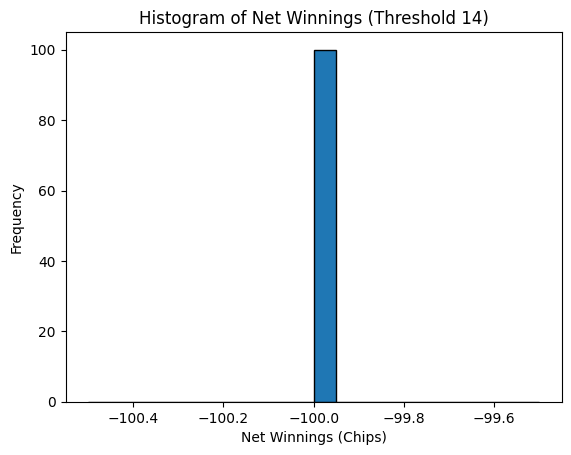

Threshold: 15
  Average winnings per game: -100.00
  Standard deviation of winnings: 0.00
  Probability of net win: 0.0000
  Probability of net loss: 1.0000


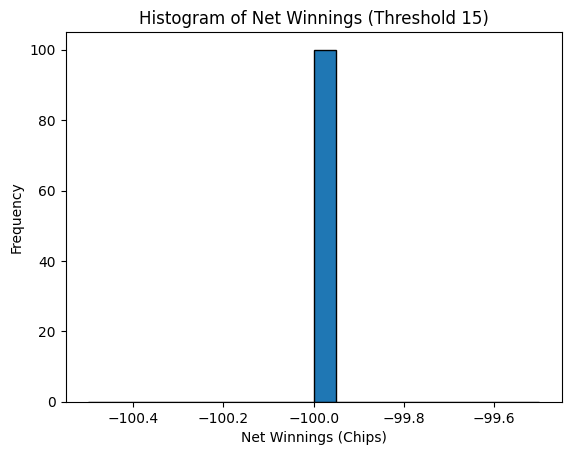

Threshold: 16
  Average winnings per game: -100.00
  Standard deviation of winnings: 0.00
  Probability of net win: 0.0000
  Probability of net loss: 1.0000


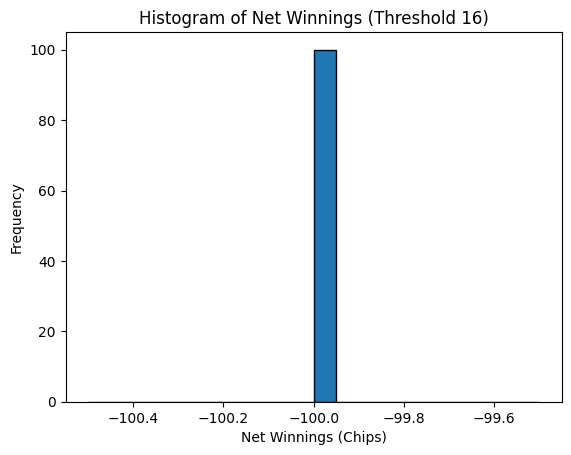

Threshold: 17
  Average winnings per game: -100.00
  Standard deviation of winnings: 0.00
  Probability of net win: 0.0000
  Probability of net loss: 1.0000


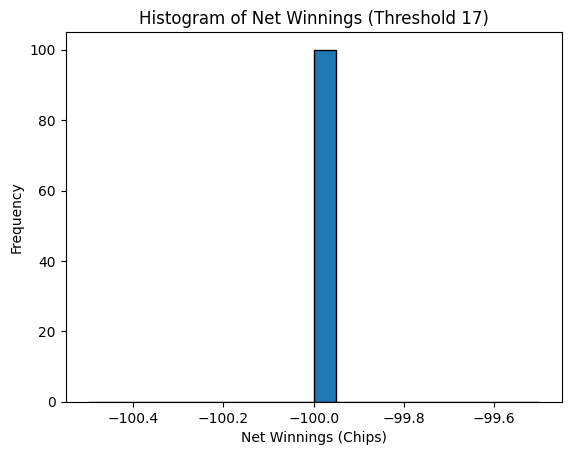

Threshold: 18
  Average winnings per game: -100.00
  Standard deviation of winnings: 0.00
  Probability of net win: 0.0000
  Probability of net loss: 1.0000


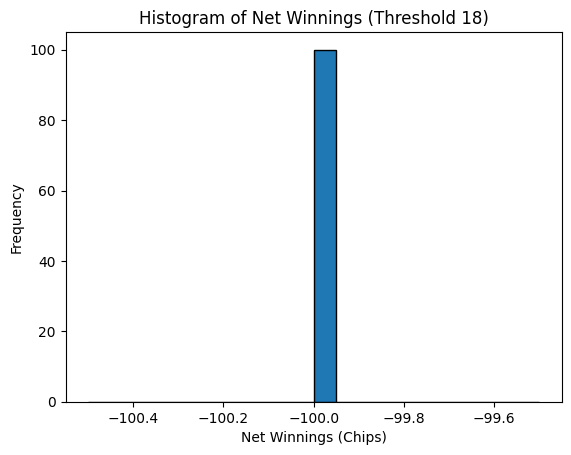

In [64]:
# Define the list of thresholds to test
threshold_values = [14, 15, 16, 17, 18]

# Run the simulation for each threshold
results = run_simulation_for_thresholds(threshold_values, num_games=100, num_rounds=50)

# Analyze the results for each threshold
analyze_results_for_thresholds(results)


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [89]:
import random

# Card class definition
class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank: str, suit: str):
        if rank == 'Plastic' and suit == 'Special':
            self.rank = rank
            self.suit = suit
        else:
            if rank not in self.RANKS:
                raise ValueError(f"Invalid rank: {rank}")
            if suit not in self.SUITS:
                raise ValueError(f"Invalid suit: {suit}")
            self.rank = rank
            self.suit = suit

    def __str__(self) -> str:
        return f'{self.rank} of {self.suit}'
    
    def __repr__(self) -> str:
        return f'{self.rank} of {self.suit}'

    def value(self) -> int:
        """Returns the Blackjack value of the card."""
        if self.rank in ['J', 'Q', 'K', '10']:
            return 10
        elif self.rank == 'A':
            return 1  # We will handle Aces as either 1 or 11 later
        else:
            return int(self.rank)

    def count_value(self) -> int:
        """Card counting strategy: assign values for strategy"""
        if self.rank in ['2', '3', '4', '5', '6']:
            return 1
        elif self.rank in ['7', '8', '9']:
            return 0
        else:
            return -1

# Deck class definition
class Deck:
    def __init__(self, num_decks: int = 1):
        self.num_decks = num_decks
        self.cards = []
        self.create_deck()

    def create_deck(self):
        """Populate the deck with the correct number of decks and shuffle it."""
        self.cards = []
        for _ in range(self.num_decks):
            for suit in Card.SUITS:
                for rank in Card.RANKS:
                    self.cards.append(Card(rank, suit))
        random.shuffle(self.cards)
    
    def draw(self) -> Card:
        """Draw a card from the deck."""
        if len(self.cards) == 0:  # If the deck is empty, reshuffle the cards
            #print("Deck is empty. Reshuffling...")
            self.create_deck()  # Recreate and reshuffle the deck
        return self.cards.pop()

    def shuffle(self):
        """Shuffles the deck."""
        random.shuffle(self.cards)
# Player class definition
class Player:
    def __init__(self, name: str, chips: int = 100):
        self.name = name
        self.hand = []
        self.bet = 0
        self.chips = chips

    def receive_card(self, card: Card):
        """Receive a card into the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self) -> int:
        """Calculate the total value of the hand, accounting for Aces as 1 or 11."""
        total = sum(card.value() for card in self.hand)
        num_aces = sum(1 for card in self.hand if card.rank == 'A')
        
        # Adjust for Aces being 11 if it doesn't bust the hand
        for _ in range(num_aces):
            if total + 10 <= 21:
                total += 10
        return total

    def show_hand(self):
        """Display the player's current hand."""
        return ', '.join(str(card) for card in self.hand)

    def is_busted(self) -> bool:
        """Check if the player has busted."""
        return self.hand_value() > 21

    def place_bet(self, amount: int):
        """Place a bet (must be less than or equal to the player's available chips)."""
        if amount <= self.chips:
            self.bet = amount
        else:
            raise ValueError("Insufficient chips to place the bet.")

    def win_bet(self):
        """Player wins the bet (typically wins double the bet)."""
        self.chips += self.bet
        self.bet = 0

    def lose_bet(self):
        """Player loses the bet."""
        self.chips -= self.bet
        self.bet = 0

    def tie_bet(self):
        """Player ties the bet."""
        self.bet = 0
    def play_turn(self, deck: Deck, verbose: bool = False):
        """Placeholder play_turn method for Player."""

        pass  
# CardCountingPlayer class definition (new strategy)
class CardCountingPlayer(Player):
    def __init__(self, name: str, chips: int, threshold: int = 17):
        super().__init__(name, chips)
        self.threshold = threshold  # Threshold for when to stay or hit

    def play_turn(self, deck: Deck, verbose: bool = False):
        """Implement the player’s strategy based on the threshold value."""
        while not self.is_busted() and self.hand_value() < self.threshold:
            # Check if there are enough cards to draw
            if len(deck.cards) == 0:
                print("Deck is empty, reshuffling...")
                deck.shuffle()  # Reshuffle if deck is empty
            card = deck.draw()
            self.receive_card(card)
            if verbose:
                print(f"{self.name} draws {card} - hand value: {self.hand_value()}")
        
        if verbose:
            print(f"{self.name}'s final hand: {self.show_hand()} (Value: {self.hand_value()})")


class DealerAwarePlayer(Player):
    def __init__(self, name: str, chips: int, threshold: int = 17):
        super().__init__(name, chips)
        self.threshold = threshold
        self.dealer_upcard = None

    def set_dealer_upcard(self, upcard: Card):
        """Set the dealer's upcard for decision-making."""
        self.dealer_upcard = upcard

    def play_turn(self, deck: Deck, verbose: bool = False):
        """Implement the dealer-aware strategy."""
        while not self.is_busted():
            hand_value = self.hand_value()

            if self.dealer_upcard is None:
                raise ValueError("Dealer's upcard is not set.")

            # Weak dealer card (2-6): player stays if hand > 12, otherwise hits
            if self.dealer_upcard.rank in ['2', '3', '4', '5', '6']:
                if hand_value <= 12:
                    if len(deck.cards) == 0:  # Ensure there's a card to draw
                        print("Deck is empty, reshuffling...")
                        deck.shuffle()  # Reshuffle if deck is empty
                    card = deck.draw()
                    self.receive_card(card)
                    if verbose:
                        print(f"{self.name} draws {card} (dealer shows {self.dealer_upcard}) - hand value: {hand_value}")
                else:
                    if verbose:
                        print(f"{self.name} stays (dealer shows {self.dealer_upcard}) - hand value: {hand_value}")
                    break

            # Neutral dealer card (7-10): player hits unless hand >= 17
            elif self.dealer_upcard.rank in ['7', '8', '9', '10']:
                if hand_value < 17:
                    if len(deck.cards) == 0:  # Ensure there's a card to draw
                        print("Deck is empty, reshuffling...")
                        deck.shuffle()  # Reshuffle if deck is empty
                    card = deck.draw()
                    self.receive_card(card)
                    if verbose:
                        print(f"{self.name} draws {card} (dealer shows {self.dealer_upcard}) - hand value: {hand_value}")
                else:
                    if verbose:
                        print(f"{self.name} stays (dealer shows {self.dealer_upcard}) - hand value: {hand_value}")
                    break

            # Dealer shows an Ace: player stays if hand >= 17
            else:  # Dealer has an Ace
                if hand_value < 17:
                    if len(deck.cards) == 0:  # Ensure there's a card to draw
                        print("Deck is empty, reshuffling...")
                        deck.shuffle()  # Reshuffle if deck is empty
                    card = deck.draw()
                    self.receive_card(card)
                    if verbose:
                        print(f"{self.name} draws {card} (dealer shows Ace) - hand value: {hand_value}")
                else:
                    if verbose:
                        print(f"{self.name} stays (dealer shows Ace) - hand value: {hand_value}")
                    break
# BlackjackGame class definition for Blackjack
class BlackjackGame:
    def __init__(self, players: list, num_decks: int = 1, verbose: bool = False):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Player("Dealer")
        self.rounds = 0
        self.verbose = verbose

    def start_game(self):
        """Start the game by dealing cards to players and the dealer."""
        self.rounds += 1

        # Deal initial two cards to each player and the dealer
        for player in self.players:
            player.clear_hand()
            player.receive_card(self.deck.draw())
            player.receive_card(self.deck.draw())

        self.dealer.clear_hand()
        self.dealer.receive_card(self.deck.draw())
        self.dealer.receive_card(self.deck.draw())

        self.play_round()

    def play_round(self):
        """Play one round of Blackjack."""
        # Players' turns
        for player in self.players:
            if player.chips <= 0:
                continue  # Skip the round if player has no chips left
            bet = min(player.chips, 10)  # Place a fixed bet for simplicity
            player.place_bet(bet)
            player.play_turn(self.deck, self.verbose)

        # Dealer's turn
        self.dealer_turn()

        # Determine winners for all players
        self.determine_winner()

    def dealer_turn(self):
        """Play the dealer's turn following the house rules."""
        while self.dealer.hand_value() < 17:
            card = self.deck.draw()
            self.dealer.receive_card(card)

    def determine_winner(self):
        """Determine the winner for the round."""
        dealer_value = self.dealer.hand_value()
        for player in self.players:
            if player.chips <= 0:
                continue  # Skip if player has no chips

            player_value = player.hand_value()
            if player.is_busted():
                player.lose_bet()
            elif dealer_value > 21:
                player.win_bet()
            elif player_value > dealer_value:
                player.win_bet()
            elif player_value < dealer_value:
                player.lose_bet()
            else:
                player.tie_bet()

    def play_multiple_rounds(self, num_rounds: int = 50):
        """Play multiple rounds and compute the strategy player's winnings."""
        strategy_player = next(player for player in self.players if isinstance(player, CardCountingPlayer))
        
        for _ in range(num_rounds):
            if strategy_player.chips <= 0:
                print(f"{strategy_player.name} is out of money!")
                break
            self.start_game()

        print(f"{strategy_player.name}'s final chip count: {strategy_player.chips}")
        return strategy_player.chips

# Test scenario setup
def test_blackjack_game():
    players = [
        CardCountingPlayer("StrategyPlayer", chips=100),
        Player("Player2", chips=100),
        Player("Player3", chips=100),
        Player("Player4", chips=100)]


In [92]:
def run_simulation_for_multiple_strategies(strategies: list, num_games: int = 100, num_rounds: int = 50):
    results = {}

    for strategy_class in strategies:  # Loop over the actual classes, not strings
        print(f"Running simulation for strategy: {strategy_class.__name__}...")
        winnings = []
        
        for game in range(num_games):
            # Set up the strategy player with the current strategy
            strategy_player = strategy_class("StrategyPlayer", chips=100)
            players = [strategy_player,
                       Player("Player2", chips=100),
                       Player("Player3", chips=100),
                       Player("Player4", chips=100)]
            
            # Initialize the game
            game_instance = BlackjackGame(players=players, num_decks=1, verbose=False)  # No verbose printouts
            
            # For each round, set the dealer's upcard
            for round in range(num_rounds):
                dealer_upcard = game_instance.dealer.hand[1]  # The dealer's upcard is the first card
                strategy_player.set_dealer_upcard(dealer_upcard)
                final_chips = game_instance.play_round()
            
            # Record the winnings (or losses) for the strategy player
            winnings.append(final_chips - 100)  # Initial chips are 100, so we track net winnings
        
        # Store results for this strategy
        results[strategy_class.__name__] = winnings  # Use strategy class name as the key
    
    return results

In [93]:
def analyze_results_for_strategies(results):
    """Analyze and compare results for each strategy."""
    
    for strategy_name, winnings in results.items():
        winnings_array = np.array(winnings)
        
        # Calculate the average and standard deviation
        avg_winnings = np.mean(winnings_array)
        std_winnings = np.std(winnings_array)
        
        # Calculate probability of net win or loss
        prob_win = np.sum(winnings_array > 0) / len(winnings_array)
        prob_loss = np.sum(winnings_array < 0) / len(winnings_array)
        
        # Print results for this strategy
        print(f"Strategy: {strategy_name}")
        print(f"  Average winnings per game: {avg_winnings:.2f}")
        print(f"  Standard deviation of winnings: {std_winnings:.2f}")
        print(f"  Probability of net win: {prob_win:.4f}")
        print(f"  Probability of net loss: {prob_loss:.4f}")
        
        # Plot histogram for this strategy
        plt.hist(winnings_array, bins=20, edgecolor='black')
        plt.title(f"Histogram of Net Winnings ({strategy_name})")
        plt.xlabel('Net Winnings (Chips)')
        plt.ylabel('Frequency')
        plt.show()

In [94]:
# List of strategies to compare (corrected)
strategies = [CardCountingPlayer, DealerAwarePlayer]

# Run the simulation for each strategy
results = run_simulation_for_multiple_strategies(strategies, num_games=100, num_rounds=50)

# Analyze and compare the results
analyze_results_for_strategies(results)

Running simulation for strategy: CardCountingPlayer...


IndexError: list index out of range